# AAI612: Deep Learning & its Applications

*Notebook 5.1: Fashion MNIST*

<a href="https://colab.research.google.com/github/OmarMlaeb/AAI612_Malaeb/blob/master/Week%205/Notebook5.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fashion MNIST Example

In this code, we build a model to recognize different items of clothing, trained from a dataset containing 10 different types.  The Fashion MNIST data is available directly in the tf.keras datasets API:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

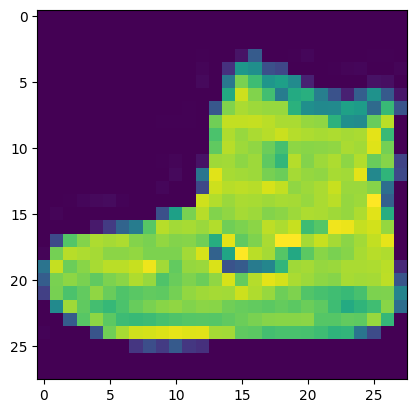

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4701 - accuracy: 0.8316   
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3588 - accuracy: 0.8674
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3194 - accuracy: 0.8821
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.8902
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2786 - accuracy: 0.8967
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9012
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9053
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2416 - accuracy: 0.9104
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2299 - accuracy: 0.9139
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

You should be able to achive a training accuracy of of at least 91%

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8919


[0.34350937604904175, 0.8919000029563904]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

### Question 1.1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications.

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[5.9710499e-13 1.3486068e-14 2.9918762e-15 2.7385952e-16 2.2936837e-12 2.8690976e-05 1.6785676e-13 1.3739032e-02 5.8277265e-13 9.8623234e-01]


What does the above output signify, after you run it is a list of numbers? Why do you think this is, and what do those numbers represent? 

**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [11]:
print(test_labels[0])

9


### Answer:
As we can see the outputs represents predicted probabilty distribution by the model over the 10 possible classes for the test_images[0], each value in the array corresponds to the probability that the input image belongs to a particular class in which the highest probability would be the models prediction. The last value 9.9993229e-01 is the highest, meaning that the model predicts class 9 for this image. Moreover, we can confirm that the models prediction matches the actual label that returned 9, meaning it correctly classified the test image.

### Question 1.2: What does this list represent? (Select one option)


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


### Answer:
3. It's the probability that this item is each of the 10 classes.

### Question 1.3: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


### Answer:
2. The 10th element on the list is the biggest, and the ankle boot is labelled 9.

### Question 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [12]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1868
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[2.0237349e-10 7.8292723e-09 3.9029462e-08 3.9578549e-06 4.2748639e-12 2.9953567e-10 1.0947184e-12 9.9999571e-01 4.9959015e-10 2.7998999e-07]
7


### Question 2.1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


### Answer:
1. Training takes longer, but is more accurate

Increasing the number of neurons from 512 to 1024 means the model has more parameters to learn, meaning more computations per layer this would increase the time required for each epoch, in addition it can capture more complex patterns.

### Question 3: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

In [13]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3024
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1012
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[2.4069845e-06 1.5923964e-08 4.3603736e-06 1.3478314e-04 1.9378917e-10 4.1817708e-07 1.6410137e-10 9.9982065e-01 2.1590149e-06 3.5189740e-05]
7


### Answer:
the Flatten() layer is necessarysince it converts the 28x28 image into a 784 length vector so that the dense layers can process it, without it the dense layers would receive them as 2d arrays and this would cause a dimension mismatch error.

### Question 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

In [14]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3009
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1473
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0841
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[2.6726764e-07 2.5025988e-08 7.1358154e-05 1.6666303e-03 1.6957996e-08 4.2042993e-06 6.4718099e-13 9.9820316e-01 1.1555512e-05 4.2804706e-05]
7


### Answer:
This would only allow to predict only one of the 5 classes, and since the labels ranges from 0 to 9 and the model only outputs 5 classes it wouldnt be able to classify all the digits correctly in which this would lead to incorrect predictions and higher loss and tensorflow would throw an error during training because the number of neurons in the final layer must match the number of classes in the dataset.

### Question 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

In [15]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2022
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0575
Epoch 5/5
313/313 [==============================] - 1s 1ms/step
[9.75321836e-19 1.40777934e-09 1.01507636e-10 1.80740102e-12 1.01892099e-10 6.56611379e-18 3.46455618e-22 1.00000000e+00 1.86734012e-16 2.09207118e-09]
7


### Answer:
this would improve the accuracy if tuned properly howver this would slower our training sue to more coputations and this would cause overfitting leading to lower test accuracy.

### Question 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

In [16]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2613
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1153
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0776
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0346
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0169
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0136
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0114
E

### Answer:
for 15 epochs it shows good accuracy without overfitting in which it is an optimal balance for many cases since the model learns more and reduces loss

for 30 epochs it shows an overfitting risk, loss may stop decreasing or increase on test data

### Question 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [17]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2020
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0804
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0530
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0361
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[5.0266227e-08 2.3544121e-08 3.4534857e-08 7.9363090e-04 6.8271584e-15 5.1719576e-07 5.8885953e-13 9.9920553e-01 4.7694675e-09 2.8146331e-07]
7


### Answer:
the input pixel values will range from 0 to 255 instead of 0 to 1 in addition to slower training, higher loss and unstable predictions

### Question 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that?

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.8302  
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4725 - accuracy: 0.8303


### Answer:
using early stopping helps in preventing overfitting and as it prevents wasting time if the model reached a desired accuracy

the on_epoch_end function checks the models accuracy after each epoch, If accuracy reaches or is greater than 0.6 threshold the traing would stop early, as well we can change it to 0.95 meaning it would stop when reaching traing accuracy 95%

to improve it we can use EarlyStopping from keras to stop when loss stops improving

monitor='loss': stops training if loss stops improving
patience=2: waits 2 epochs before stopping, in case of small fluctuations.
restore_best_weights=True: restores the best model state before stopping

reached 94% by trying it

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)
model.fit(training_images, training_labels, epochs=20, callbacks=[early_stopping])

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4769 - accuracy: 0.8294
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3598 - accuracy: 0.8674
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3243 - accuracy: 0.8809
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.8901
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8953
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9011
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9060
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2423 - accuracy: 0.9099
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2299 - accuracy: 0.9135
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.222